# Linear Regression Implementations

### Implementing Mini-Batch Gradient Descent Using Numpy

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
np.random.seed(42)
import matplotlib.pyplot as plt

In [9]:
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new

In [10]:
# The gradient descent step will be performed multiple times on
# the dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

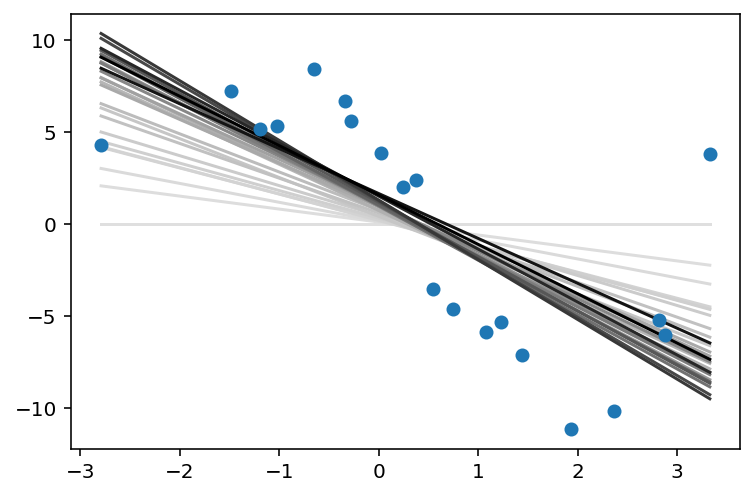

In [16]:
# perform gradient descent
data = np.loadtxt('data.txt', 
                  delimiter = ',', skiprows= 1)
X = data[:,:-1]
y = data[:,-1]

regression_coef = miniBatchGD(X, y)

plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

### Linear Regression on a Dataset from Gapminder

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
filepath = 'bmi_and_life_expectancy.csv'
bmi_life_data = pd.read_csv(filepath)
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [19]:
x_values = (bmi_life_data['BMI']
            .values
            .reshape(-1, 1))
y_values = (bmi_life_data['Life expectancy']
            .values
            .reshape(-1, 1))

bmi_life_model = LinearRegression()
bmi_life_model.fit(x_values, y_values)

laos_life_exp = bmi_life_model.predict([[21.07931]])
laos_life_exp

array([[60.31564716]])

### Linear Regression on the Boston Housing Dataset

The Boston dataset consists of 13 features of 506 houses as well as the median home value in thousands of dollars.

In [20]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [21]:
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

print(x.shape, y.shape)

(506, 13) (506,)


In [22]:
boston_model = LinearRegression().fit(x, y)

sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 
                 0.00000000e+00, 4.89000000e-01, 6.32600000e+00, 
                 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 
                 2.77000000e+02, 1.86000000e+01, 3.94870000e+02, 
                 1.09700000e+01]]
prediction = boston_model.predict(sample_house)
prediction

array([23.68284712])

### Polynomial Regression

The dataset is small (20 samples) and nonlinear.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [25]:
filepath = 'data.txt'
poly_reg_data = (pd.read_csv(filepath)
                 .sort_values(['Var_X'])
                 .reset_index(drop=True))

print(poly_reg_data.shape)
poly_reg_data.head()

(20, 2)


,Var_X,Var_Y
0,-2.79140,4.29794
1,-1.48662,7.22328
2,-1.19438,5.16161
3,-1.01925,5.31123
4,-0.65046,8.43823


In [26]:
X = (poly_reg_data['Var_X']
     .values
     .reshape(-1, 1))
y = (poly_reg_data['Var_Y']
     .values
     .reshape(-1, 1))
print(X.shape, y.shape)

(20, 1) (20, 1)


In [27]:
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (20, 3)


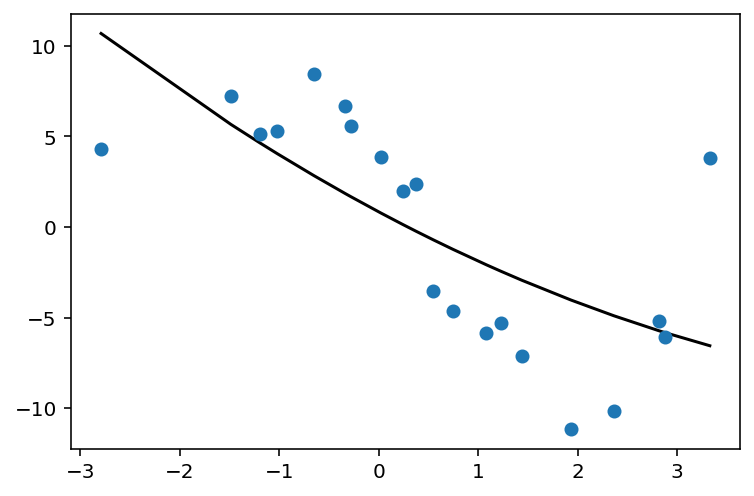

In [28]:
fit_and_plot_poly_deg(2)

X_poly shape is: (20, 4)


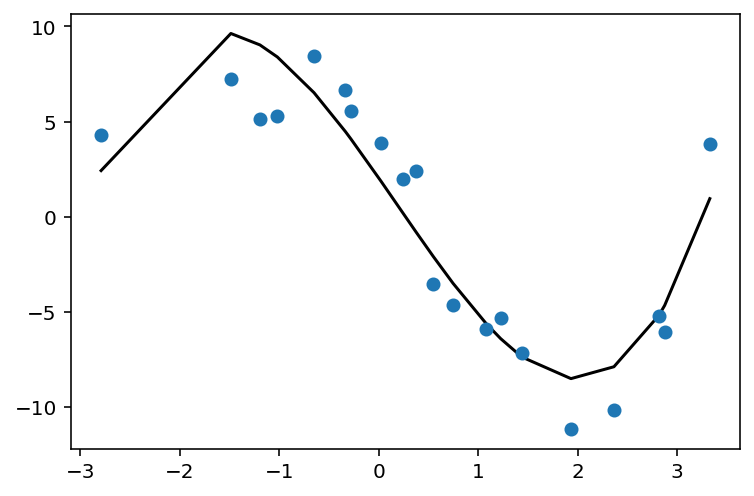

In [29]:
fit_and_plot_poly_deg(3)

X_poly shape is: (20, 5)


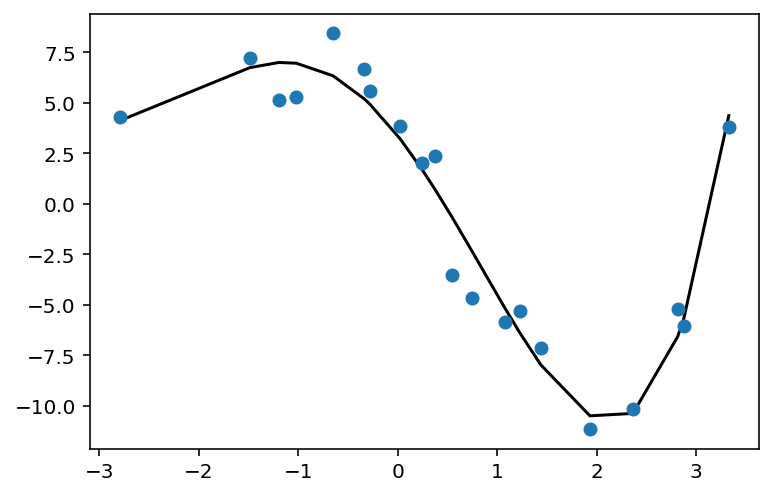

In [30]:
fit_and_plot_poly_deg(4)

### Regularization with Lasso

In [31]:
from sklearn.linear_model import Lasso

In [32]:
filepath = 'datav2.txt'
lasso_data = pd.read_csv(filepath,
                         header=None)
print(lasso_data.shape)
lasso_data.head()

(100, 7)


,0,1,2,3,4,5,6
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122


In [33]:
X = (lasso_data[lasso_data.columns[0:6]]
     .values)
y = (lasso_data[lasso_data.columns[6]]
     .values)
print(X.shape, y.shape)

(100, 6) (100,)


In [34]:
lasso_reg = Lasso().fit(X, y)
lasso_reg.coef_

array([ 0.        ,  2.35793224,  2.00441646, -0.05511954, -3.92808318,
        0.        ])

Lasso used regularization to zero out the coefficients for two of the input features, columns 0 and 6

### Standardization

This example uses the same data as in the “Regularization with Lasso” example above, except it standardizes it.

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
X = (lasso_data[lasso_data.columns[0:6]]
     .values)
y = (lasso_data[lasso_data.columns[6]]
     .values)
print(X.shape, y.shape)

(100, 6) (100,)


In [40]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [41]:
lasso_reg = Lasso().fit(X_scaled, y)
lasso_reg.coef_

array([  0.        ,   3.90753617,   9.02575748,  -0.        ,
       -11.78303187,   0.45340137])

Note that following regularization, Lasso has zeroed out the coefficients for different columns, namely 0 and 4 rather than 0 and 6.

This is an example of why it is important to apply feature scaling before using regularization techniques.